# 데이터 분석전 필요한 모듈

In [1]:
# pandas, matplotlib, numpy, sklearn, seaborn csv 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from IPython.display import set_matplotlib_formats
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'

import warnings
warnings.filterwarnings(action='ignore')

# 폰트가 선명하게 보이기 위해
set_matplotlib_formats('retina')

# 전체적 파악을 위한 대략적 분석

In [2]:
data =  pd.read_csv('/Users/pongpongi/Desktop/Machine Learining/project/최종_제출/한국외대_머신러닝_2조_원본데이터.csv')  #데이터 불러오기
data.head()  # 데이터 확인

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0


In [3]:
# 데이터 정보확인, 문제없음
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6684 non-null   float64
 1   Gender               6684 non-null   object 
 2   Education Level      6684 non-null   int64  
 3   Job Title            6684 non-null   object 
 4   Years of Experience  6684 non-null   float64
 5   Salary               6684 non-null   float64
 6   Country              6684 non-null   object 
 7   Race                 6684 non-null   object 
 8   Senior               6684 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 470.1+ KB


In [22]:
# 데이터 간략히 분석
data.describe()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
count,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000
mean,33.610563,0.549222,1.622382,72.686864,8.076750,115307.175194,2.007780,4.869390,0.143477
std,7.595994,0.497609,0.880474,34.129358,6.030419,52806.810881,1.416941,3.386053,0.350585
min,21.000000,0.000000,0.000000,0.000000,0.000000,350.000000,0.000000,0.000000,0.000000
25%,28.000000,0.000000,1.000000,51.000000,3.000000,70000.000000,1.000000,1.000000,0.000000
50%,32.000000,1.000000,1.000000,76.000000,7.000000,115000.000000,2.000000,5.000000,0.000000
75%,38.000000,1.000000,2.000000,103.000000,12.000000,160000.000000,3.000000,9.000000,0.000000
max,62.000000,1.000000,3.000000,128.000000,34.000000,250000.000000,4.000000,9.000000,1.000000


# 세부분석 및 시각화

In [5]:
# 칼럼 확인
data.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary', 'Country', 'Race', 'Senior'],
      dtype='object')

<Axes: xlabel='Gender', ylabel='Salary'>

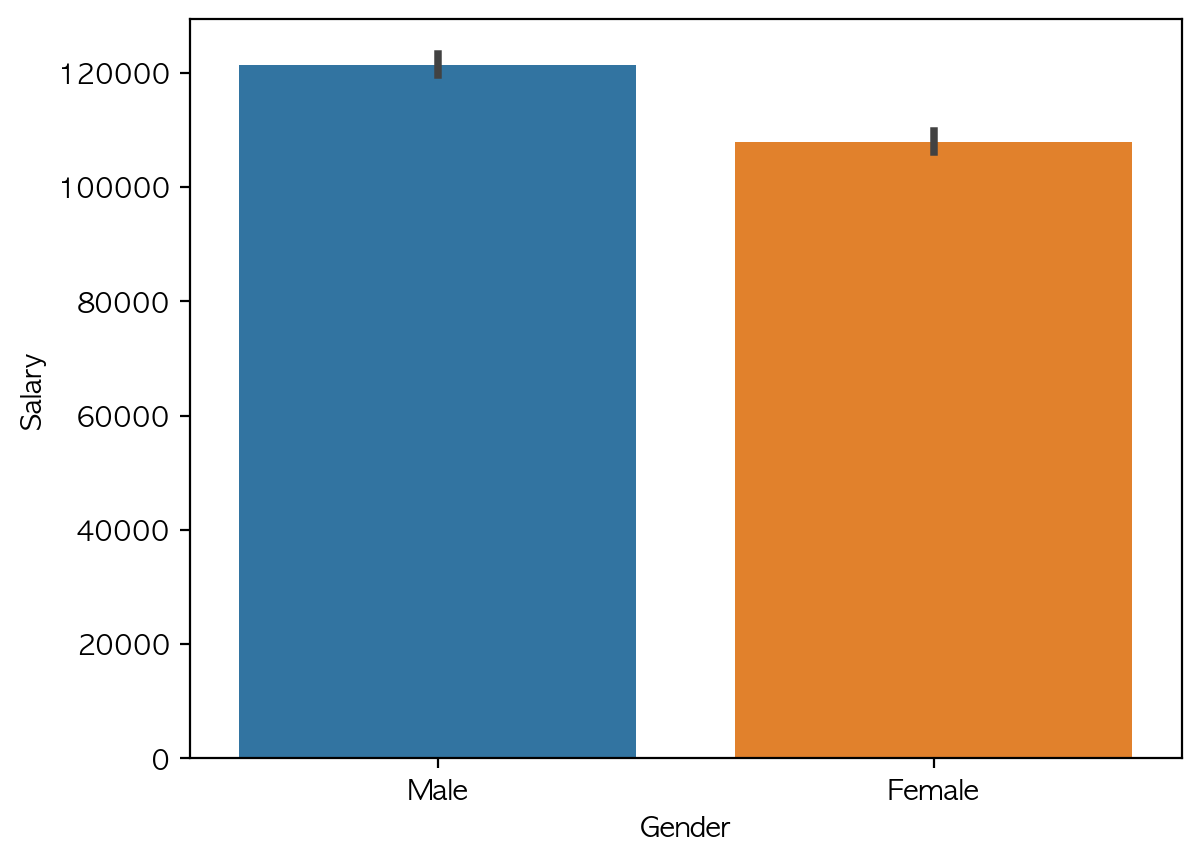

In [6]:
# 성비에 따른 연봉
sns.barplot(data, x="Gender", y="Salary")

<Axes: xlabel='Senior', ylabel='Salary'>

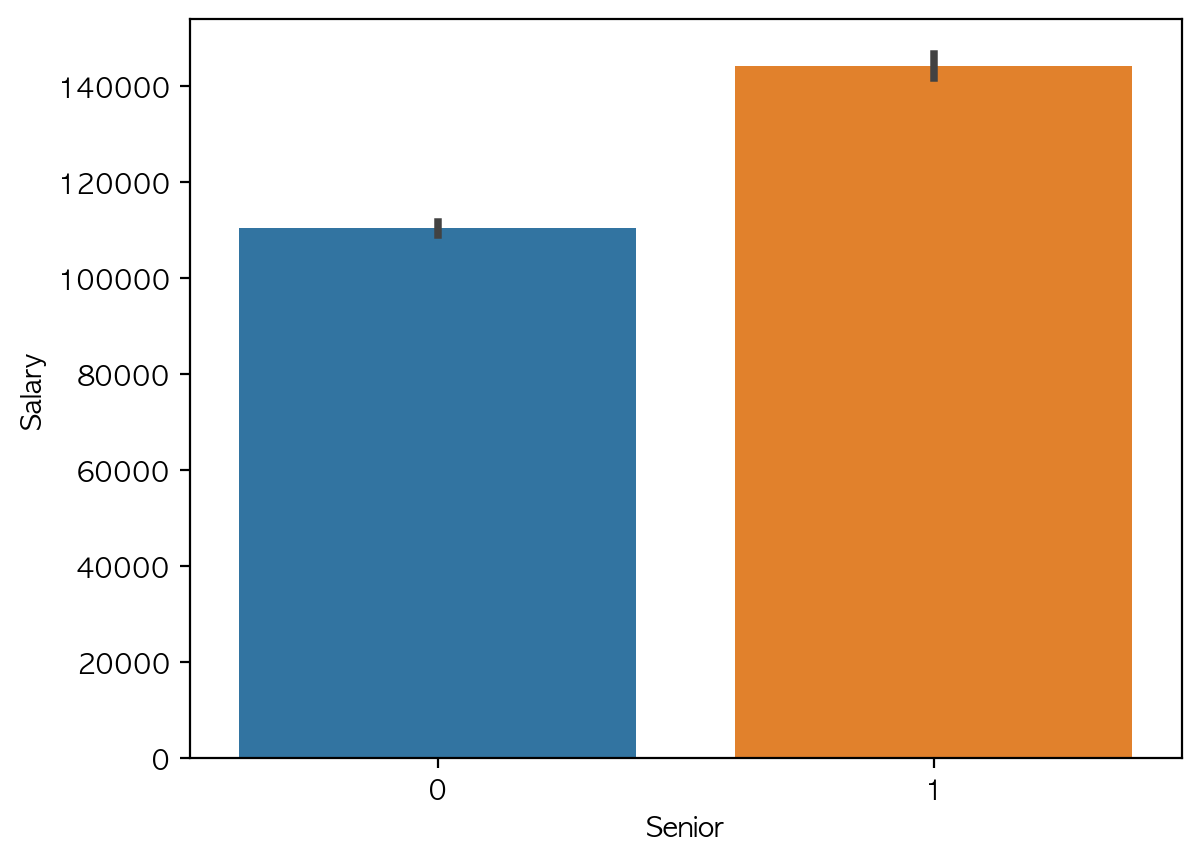

In [7]:
# Senior에 따른 연봉
# Senior란 고위 직책 여부를 뜻합니다.

sns.barplot(data, x="Senior", y="Salary")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Hispanic'),
  Text(2, 0, 'Asian'),
  Text(3, 0, 'Korean'),
  Text(4, 0, 'Chinese'),
  Text(5, 0, 'Australian'),
  Text(6, 0, 'Welsh'),
  Text(7, 0, 'African American'),
  Text(8, 0, 'Mixed'),
  Text(9, 0, 'Black')])

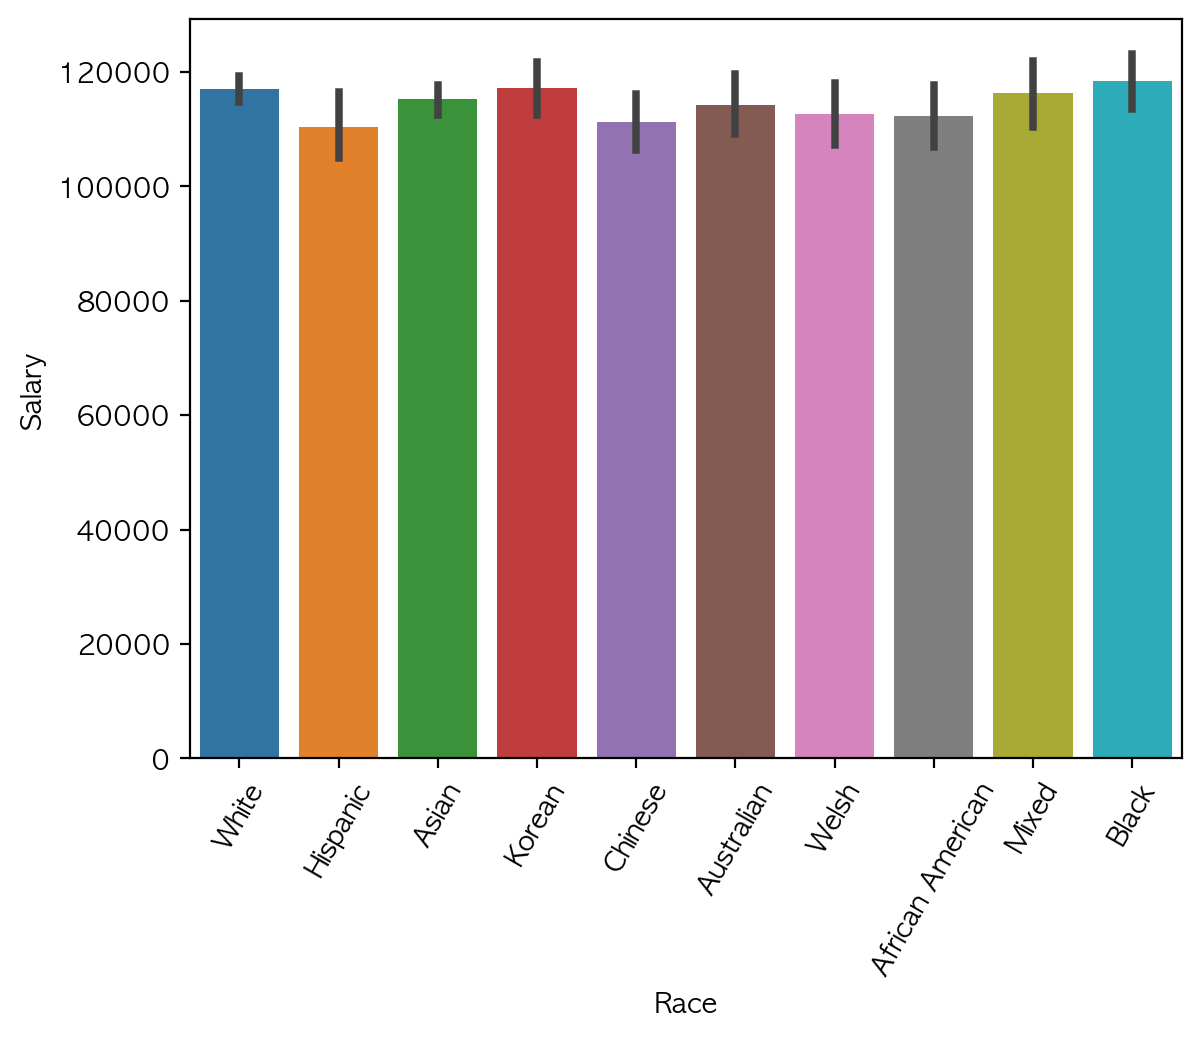

In [8]:
# 인종별 연봉 분포
# 고르게 분포되어 있습니다.

sns.barplot(data, x="Race", y="Salary")
plt.xticks(rotation=60)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'UK'),
  Text(1, 0, 'USA'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'China'),
  Text(4, 0, 'Australia')])

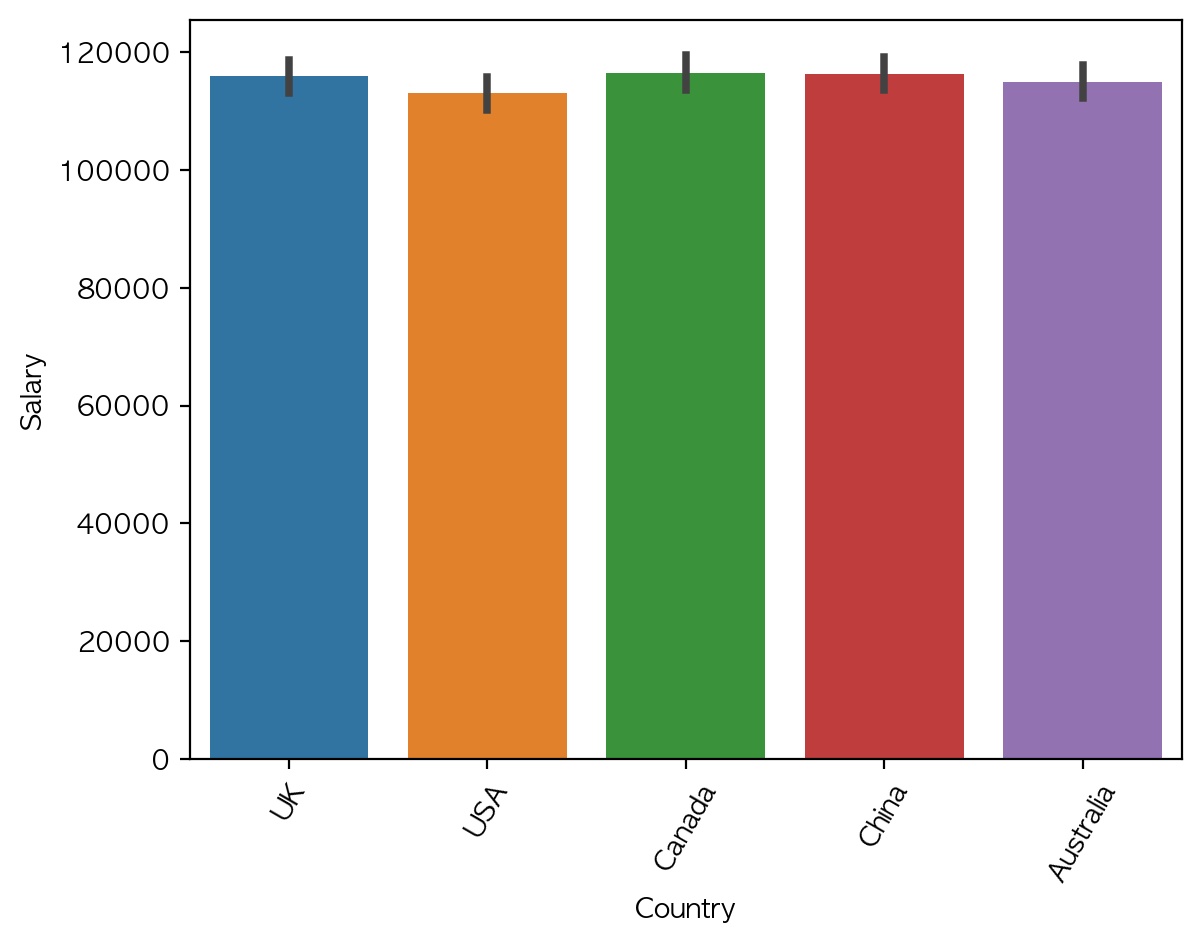

In [9]:
# 근무 국가별 연봉 분포
sns.barplot(data, x="Country", y="Salary")
plt.xticks(rotation=60)

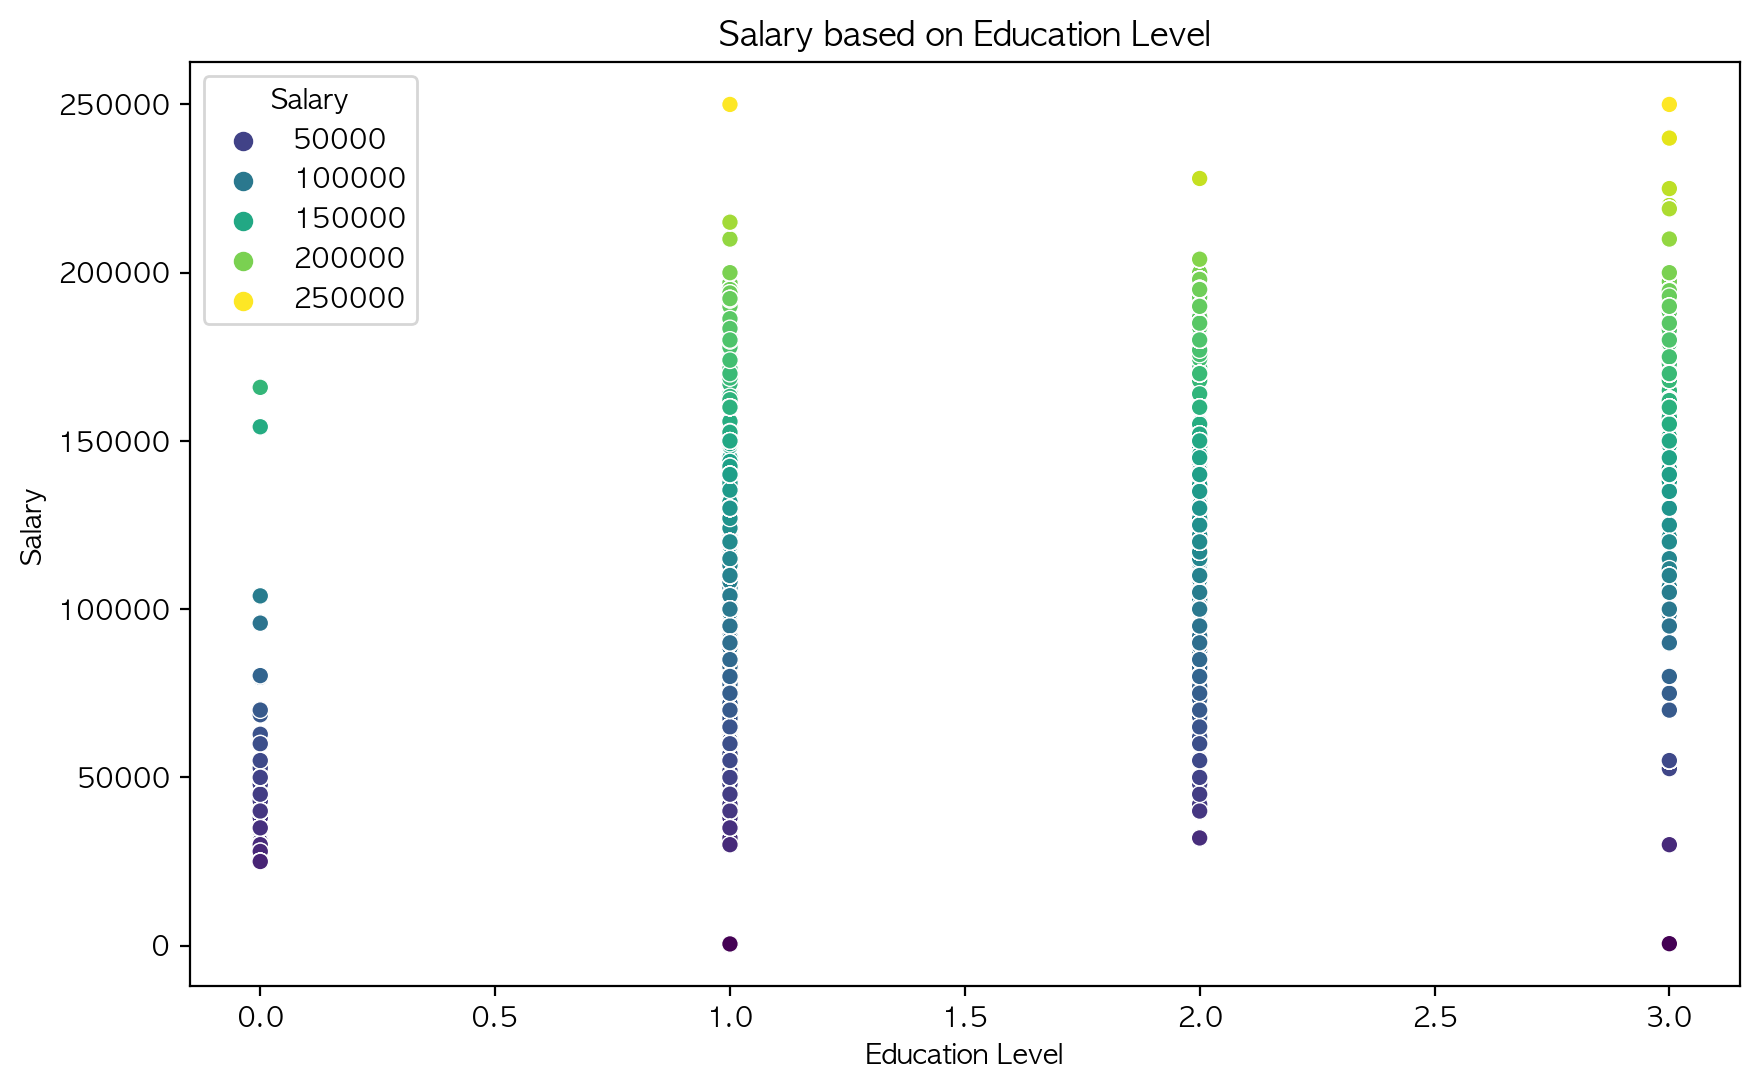

In [10]:
# 교육 수준에 따른 연봉
# 고학력일수록 고연봉에 분포되어 있습니다.
# 0=고졸 1=학사 2=석사 3=박사

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Education Level', y='Salary', hue='Salary', palette='viridis')
plt.title('Salary based on Education Level')
plt.show()

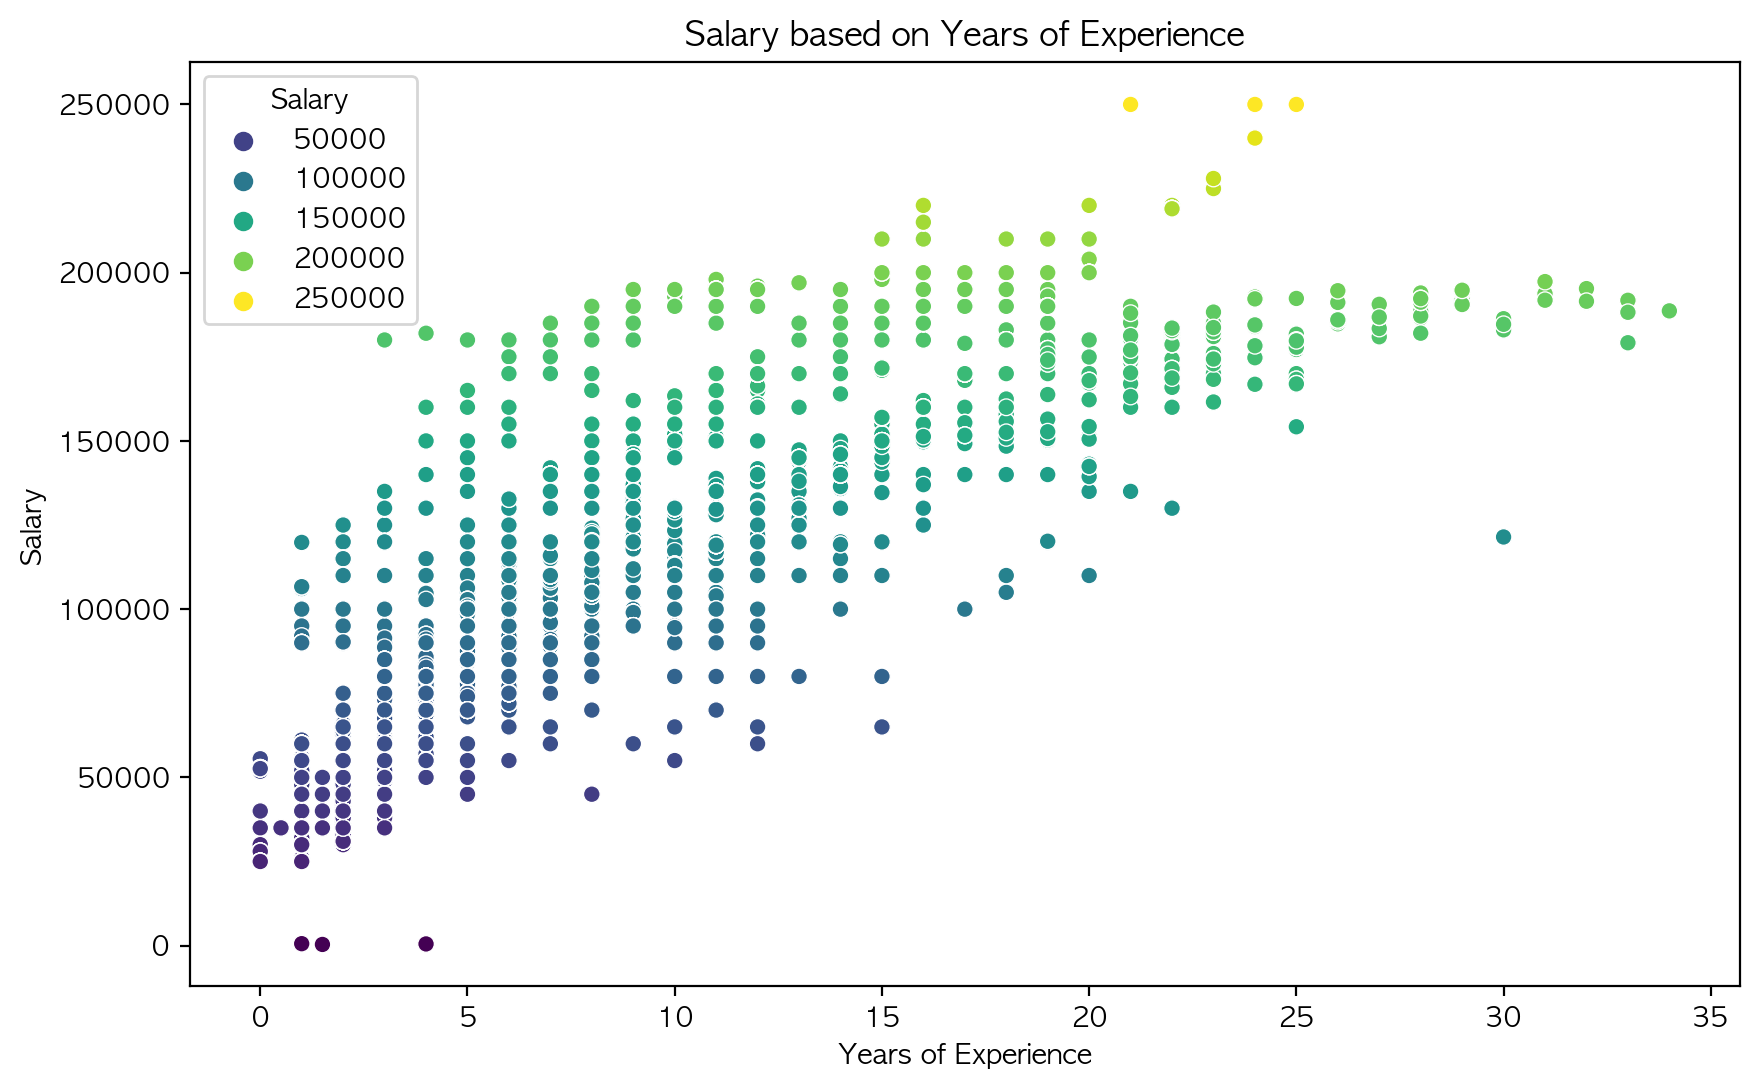

In [11]:
# 경력에 따른 연봉

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Years of Experience', y='Salary', hue='Salary', palette='viridis')
plt.title('Salary based on Years of Experience')
plt.show()

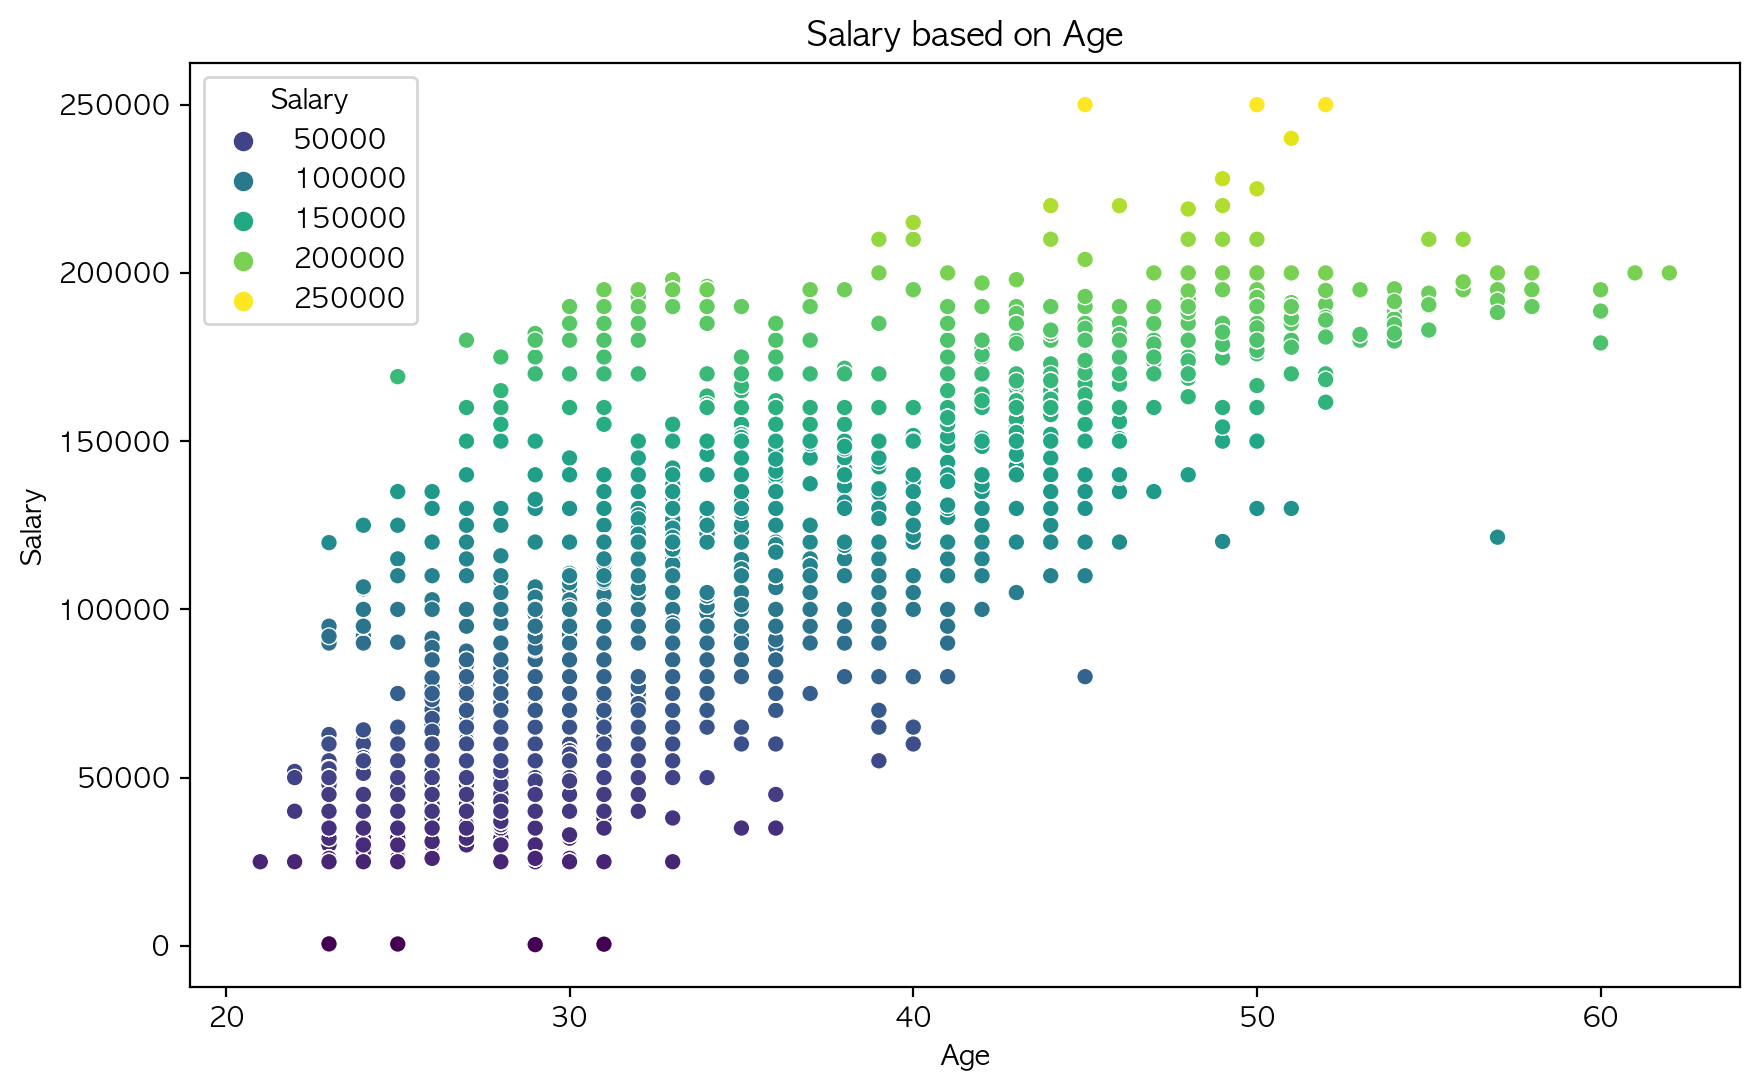

In [12]:
# 나이에 따른 연봉

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='Salary', hue='Salary', palette='viridis')
plt.title('Salary based on Age')
plt.show()

## Job칼럼에 대한 분석

In [13]:
# 종류 확인

data['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Manager', 'Sales Associate',
       'Director', 'Marketing Analyst', 'Product Manager',
       'Sales Manager', 'Marketing Coordinator', 'Scientist',
       'Software Developer', 'HR Manager', 'Financial Analyst',
       'Project Manager', 'Customer Service Rep', 'Operations Manager',
       'Marketing Manager', 'Engineer', 'Data Entry Clerk',
       'Sales Director', 'Business Analyst', 'VP of Operations',
       'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Developer',
       'Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
       'Director of Marketing', 'Help Des

In [14]:
# 직업별 수 확인

value_counts = data['Job Title'].value_counts()
print(value_counts)

Job Title
Software Engineer                 809
Data Scientist                    515
Data Analyst                      391
Software Engineer Manager         376
Product Manager                   323
                                 ... 
Customer Support Specialist         1
VP of Finance                       1
Director of Product Management      1
CEO                                 1
Human Resources Director            1
Name: count, Length: 129, dtype: int64


# 상관관계 분석

In [15]:
# 상관관계 분석을 위한 Label인코딩
# 원 핫 인코딩보다 시각적으로 보기 좋은 라벨 인코딩 수행

le  = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Job Title'] = le.fit_transform(data['Job Title'])
data['Country'] = le.fit_transform(data['Country'])
data['Race'] = le.fit_transform(data['Race'])
data['Salary'] = data['Salary'].astype(int)
data['Age'] = data['Age'].astype(int)
data['Years of Experience'] = data['Years of Experience'].astype(int)

In [16]:
# 인코딩이 잘 수행되었는지 확인

data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32,1,1,112,5,90000,3,9,0
1,28,0,2,24,3,65000,4,5,0
2,45,1,3,72,15,150000,1,9,1
3,36,0,1,100,7,60000,4,5,0
4,52,1,2,34,20,200000,4,1,0


<Axes: >

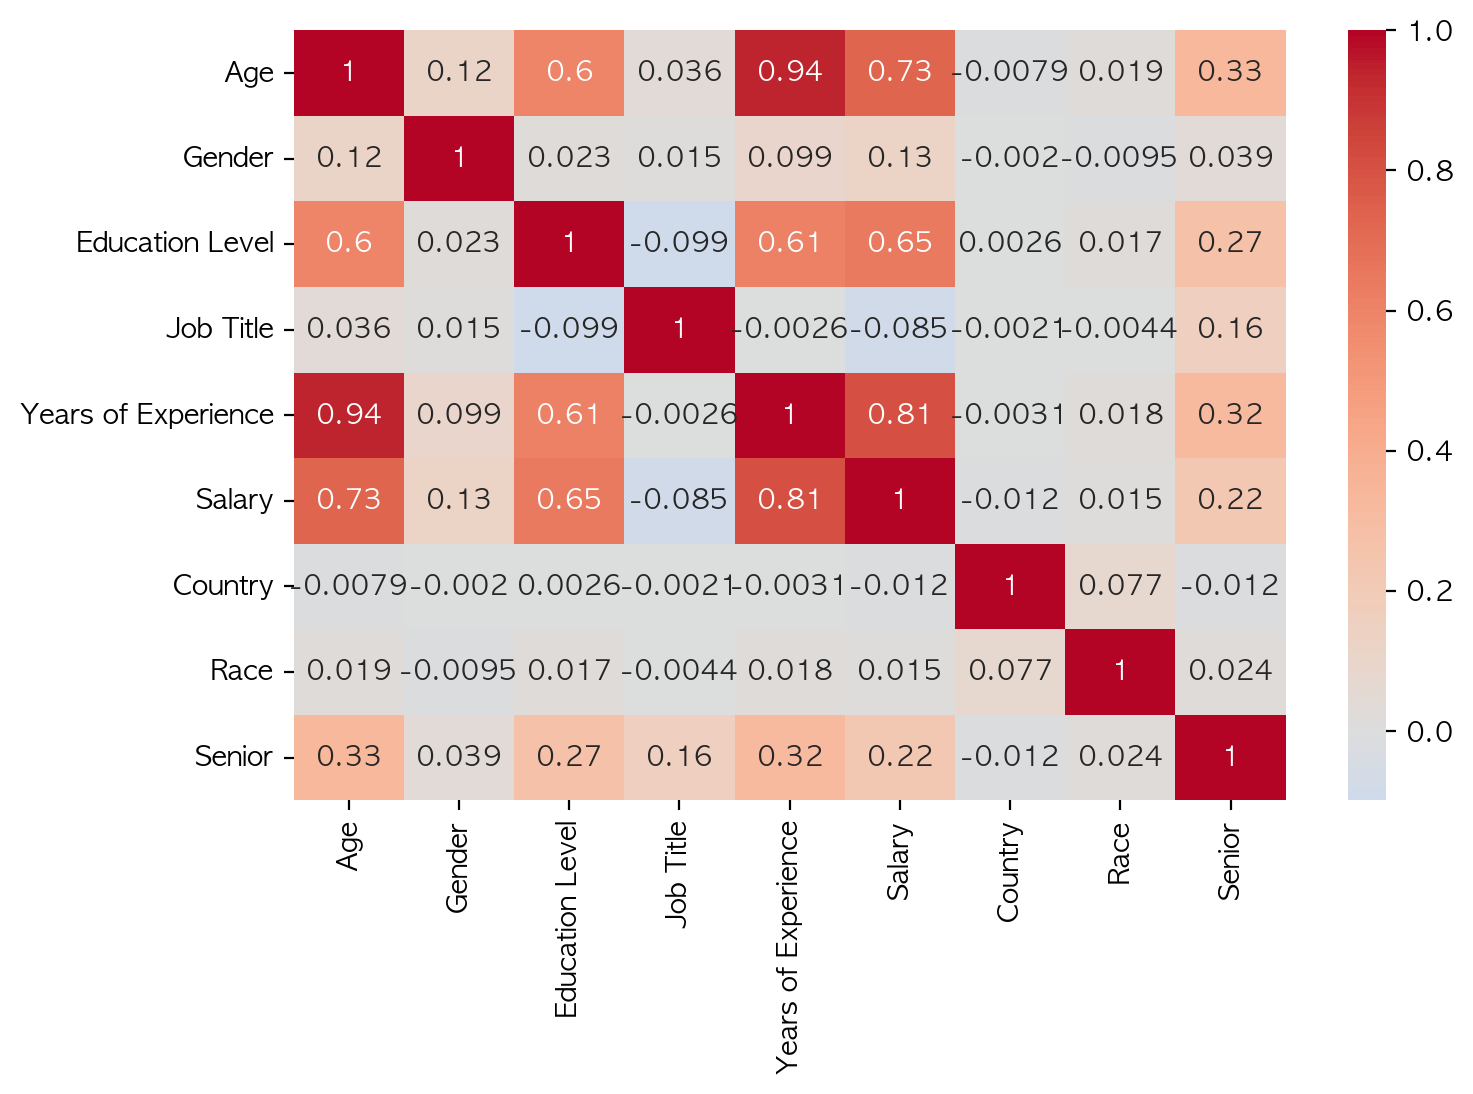

In [17]:
# 상관관계확인
# 종속변수인 salary에 대하여 'age', 'education level', 'years of experience' 정도가 상관성이 높습니다.

corr_matrix=data.corr()
plt.figure(1, figsize=(8,5))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=True)

# 모델 설계

In [18]:
X = data.drop(['Salary'],axis =1)
y = data['Salary']

# 데이터를 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForestRegressor 모델 훈련
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# 예측하고 모델 평가
y_pred = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [19]:
X = data.drop(['Salary'],axis =1)
y = data['Salary']

# 데이터를 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 훈련
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# 선형 회귀 모델 예측 및 평가
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

In [20]:
# RandomForestRegressor 모델 평가
print("Random Forest Regressor 평가:")
print(f"RMSE : {rmse}")
print(f"R² score : {r2}")
print("\n")

# Linear Regression 모델 평가
print("Linear Regression 평가:")
print(f"RMSE : {rmse_linear}")
print(f"R² score : {r2_linear}")

Random Forest Regressor 평가:
RMSE : 9828.569451026759
R² score : 0.9652379066886123


Linear Regression 평가:
RMSE : 28210.141940745685
R² score : 0.7136245121741384


랜덤포레스트 모델이 R-square 값, RMSE 값 모두 적합한 것으로 판단하였습니다.

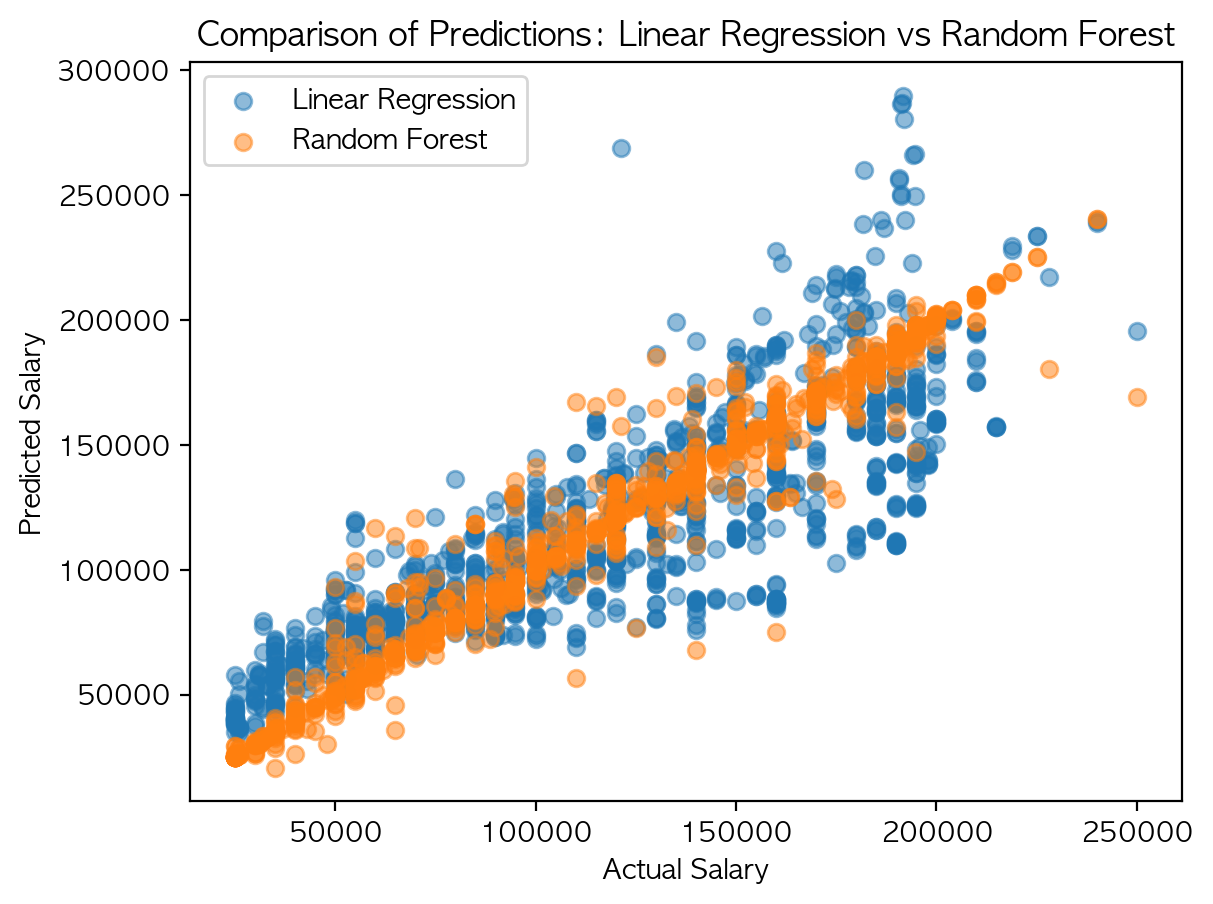

In [21]:
# 선형 회귀 분석과 랜덤포레스트 차이 시각화
# RF 모델이 예측 성능이 더 좋음을 볼 수 있습니다.

plt.scatter(y_test, y_pred_linear, label='Linear Regression', alpha=0.5)
plt.scatter(y_test, y_pred, label='Random Forest', alpha=0.5)

plt.title('Comparison of Predictions: Linear Regression vs Random Forest')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.legend()
plt.show()